<h1>FaceBook Prophet</h1>

In [4]:
from prophet import Prophet

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
def get_csv(path: str) -> pd.DataFrame:

    return pd.read_csv(path, parse_dates = ['Date'])\
        .drop(columns = ['Currency', '24h Open (USD)', '24h High (USD)', '24h Low (USD)'])\
        .rename(columns = {'Date': 'ds', 'Closing Price (USD)': 'y'})


def plot_graph(*args, title: str = None, colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'], **kwargs) -> None:

    plt.figure(figsize = (20, 6))
    number_of_graph = 0
    
    if title is not None:
        plt.title(title)

    for arg in args:
        plt.plot(arg, color = colors[number_of_graph % len(colors)])
        number_of_graph += 1

    for kw in kwargs:
        plt.plot(kwargs[kw], label = kw, color = colors[number_of_graph % len(colors)])
        number_of_graph += 1

    if len(kwargs) > 0:
        plt.legend(loc = 'best')

    plt.show()

In [12]:
df_ada = get_csv('./data/cardano.csv')

In [13]:
model = Prophet(daily_seasonality = False, yearly_seasonality = True)
model.fit(df_ada)

future = model.make_future_dataframe(periods = 14)
forecast = model.predict(future)

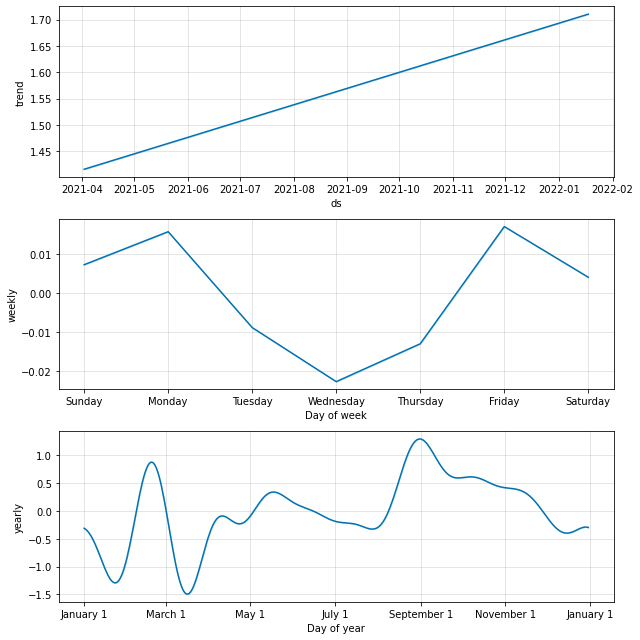

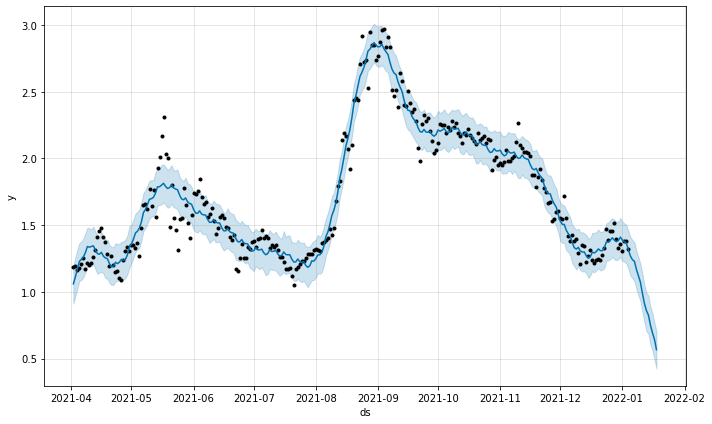

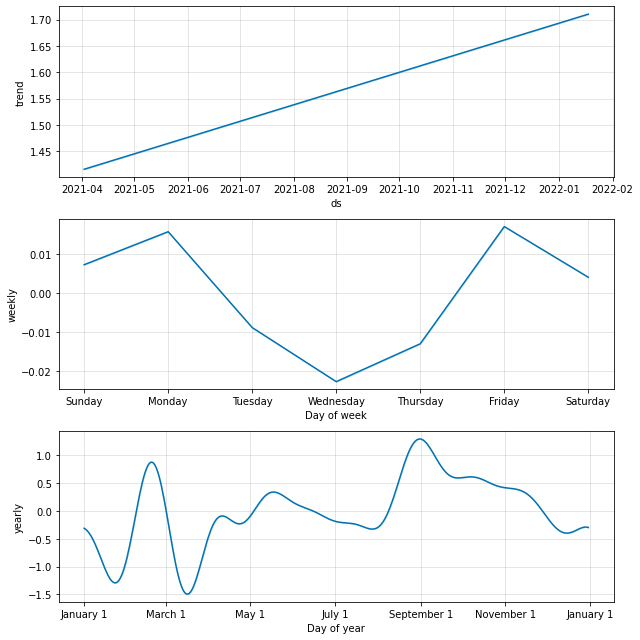

In [14]:
model.plot(forecast)
model.plot_components(forecast)